---
title: Data Screening
description: Screening and filtering data from the IGN catalog down to the relevant events for La Palma
authors:
  - name: Steve Purves
    orcid: 0000-0002-0760-5497
---

Load and review the data, check that dates are loaded properly and filter data down to the events in La Palma only. The dataset itself contains all recent IGN earthquake data for Spanish territory.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/catalogoComunSV_1663233588717.csv', sep=';')
df.columns = ['Event', 'Date', 'Time', 'Latitude', 'Longitude', 'Depth(km)', 'Intensity','Magnitude', 'Type Mag', 'Location']
df['Time'] = df['Time'].str.strip()
df['Date'] = df['Date'].str.strip()
df['DateTime'] = (df['Date'] + ' ' + df['Time']).apply(pd.to_datetime, format='%d/%m/%Y %H:%M:%S')
df['Timestamp'] = pd.to_numeric(pd.to_datetime(df['DateTime']))
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by=['DateTime'], ascending=True)
df.head()

,Event,Date,Time,Latitude,Longitude,Depth(km),Intensity,Magnitude,Type Mag,Location,DateTime,Timestamp
0,es2017aaaga,2017-01-01,00:48:55,36.6765,-11.2736,0.0,,2.8,6,SW CABO DE SAN VICENTE,2017-01-01 00:48:55,1483231735000000000
1,es2017aaakn,2017-01-01,01:28:17,28.1119,-16.2225,21.0,,0.9,4,ATLÁNTICO-CANARIAS,2017-01-01 01:28:17,1483234097000000000
2,es2017aaang,2017-01-01,01:49:08,42.0648,-7.8471,22.0,,2.0,4,SW RAIRIZ DE VEIGA.OU,2017-01-01 01:49:08,1483235348000000000
3,es2017aabdd,2017-01-01,02:36:20,38.3826,-9.3767,11.0,,2.2,4,ATLÁNTICO-PORTUGAL,2017-01-01 02:36:20,1483238180000000000
4,es2017aabkh,2017-01-01,03:35:03,36.2492,-7.8227,13.0,,1.9,4,GOLFO DE CÁDIZ,2017-01-01 03:35:03,1483241703000000000


In [4]:
df.describe()

,Latitude,Longitude,Depth(km),Magnitude,Type Mag,Timestamp
count,58036.000000,58036.000000,58036.000000,58036.000000,58036.000000,5.803600e+04
mean,34.806854,-8.356855,11.450831,1.881846,4.031153,1.596182e+18
std,5.263327,7.119341,11.111965,0.763577,0.291332,4.954865e+16
min,26.349300,-19.930400,0.000000,-0.500000,3.000000,1.483232e+18
25%,28.563800,-16.672325,3.000000,1.400000,4.000000,1.559327e+18
50%,35.989200,-4.785250,10.000000,1.800000,4.000000,1.612319e+18
75%,37.890700,-3.234500,14.300000,2.400000,4.000000,1.635568e+18
max,44.985000,5.996600,115.000000,6.000000,6.000000,1.663232e+18


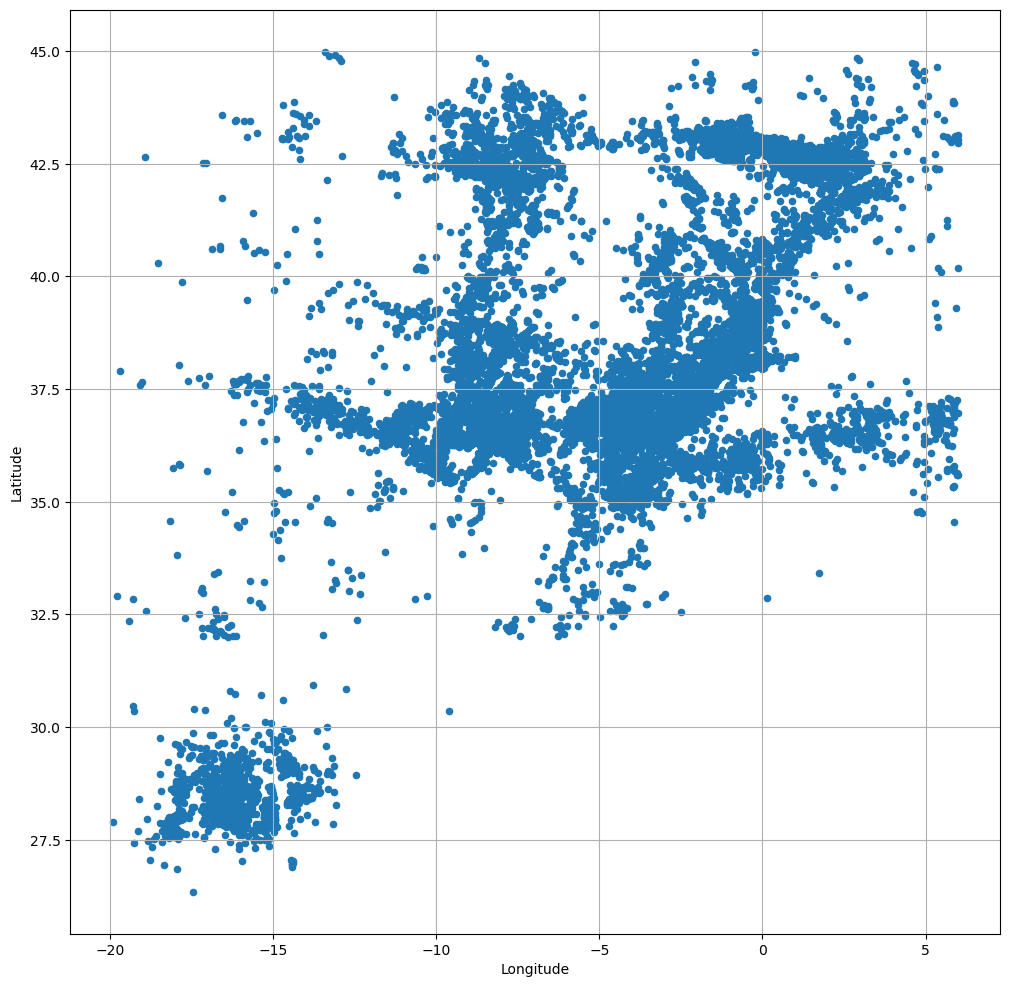

In [5]:
df.plot.scatter(x="Longitude", y="Latitude", figsize=(12,12), grid="on");

### Filter down to La Palma events only
Also some rows seem to be missing depth measurements, (see differences in the **count** for columns above) - take only rows with valid depths

In [6]:
df = df[(df['Latitude'] < 28.7) & (df['Latitude'] > 28.3) & (df['Longitude'] < -17.7) & (df['Longitude'] > -18)]
df = df[df['Depth(km)'].notna()]
df.describe()

,Latitude,Longitude,Depth(km),Magnitude,Type Mag,Timestamp
count,11347.000000,11347.000000,11347.000000,11347.000000,11347.0,1.134700e+04
mean,28.568893,-17.844062,14.089345,2.432423,4.0,1.633359e+18
std,0.021899,0.027345,8.624787,0.705282,0.0,2.007970e+16
min,28.310200,-17.995800,0.000000,0.200000,4.0,1.489103e+18
25%,28.558000,-17.854100,10.100000,1.900000,4.0,1.633777e+18
50%,28.564000,-17.838700,11.300000,2.600000,4.0,1.635671e+18
75%,28.574300,-17.829700,13.900000,2.900000,4.0,1.638294e+18
max,28.697800,-17.705700,46.900000,5.100000,4.0,1.663128e+18


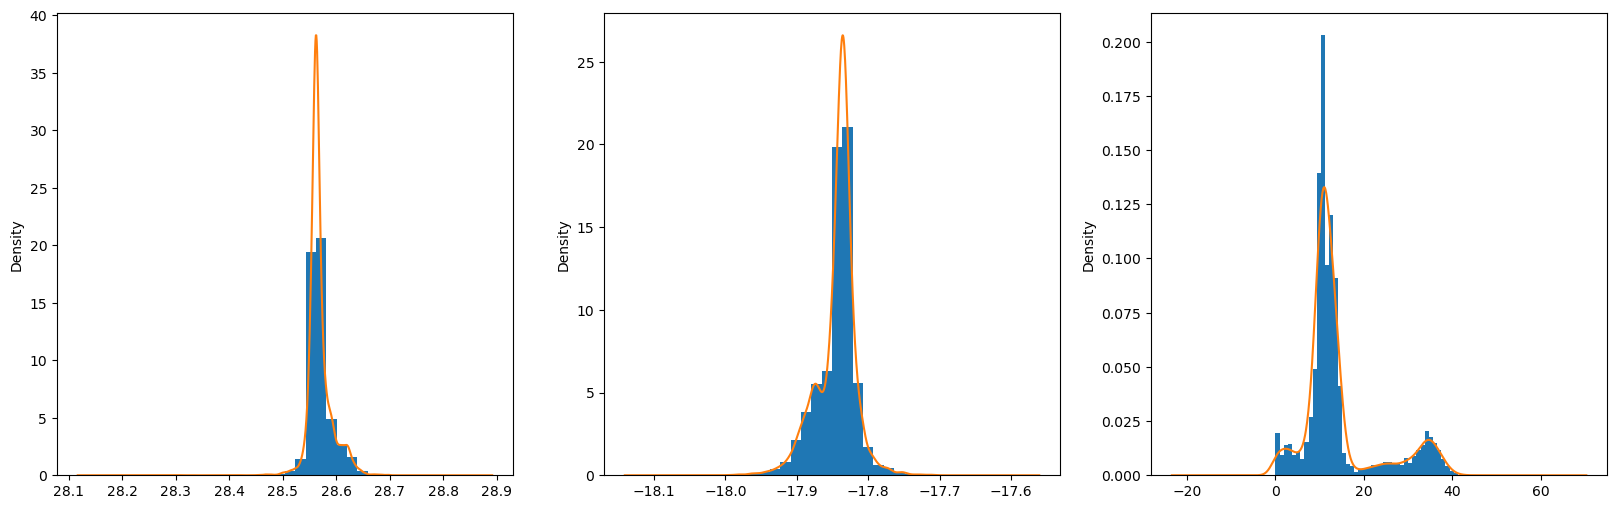

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df["Latitude"].plot.hist(bins=20, density=True)
df["Latitude"].plot.kde()
plt.subplot(1,3,2)
df["Longitude"].plot.hist(bins=20, density=True)
df["Longitude"].plot.kde()
plt.subplot(1,3,3)
df["Depth(km)"].plot.hist(bins=50, density=True)
_=df["Depth(km)"].plot.kde()

## Spatial Plot

Scatter plot the spatial locations of events

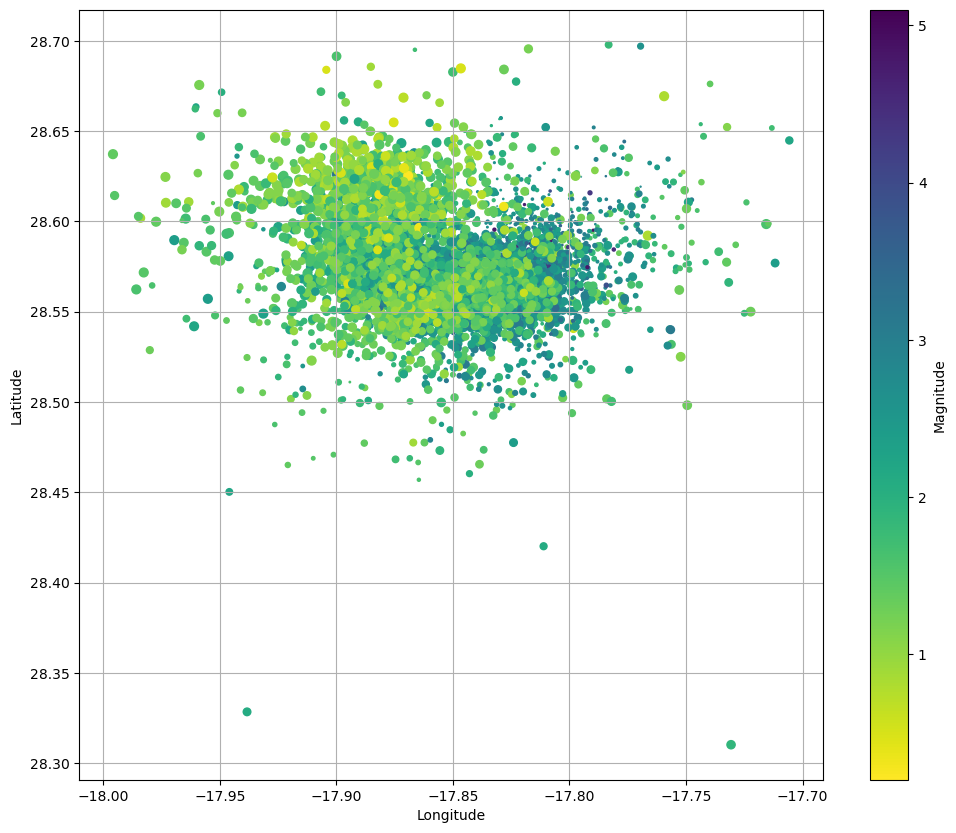

In [14]:
#| label: fig-spatial-plot
#| fig-cap: "Locations of earthquakes on La Palma since 2017."
#| fig-alt: "A scatterplot of earthquake locations plotting latitude 
#|   against longitude."
from matplotlib import colormaps
cmap = colormaps['viridis_r']
ax = df.plot.scatter(x="Longitude", y="Latitude", 
                     s=40-df["Depth(km)"], c=df["Magnitude"], 
                     figsize=(12,10), grid="on", cmap=cmap)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Magnitude")

plt.show()

### Timeline Plot

Scatter plot the event time series and look for any quantization issues. Have times & dates been loaded correctly?

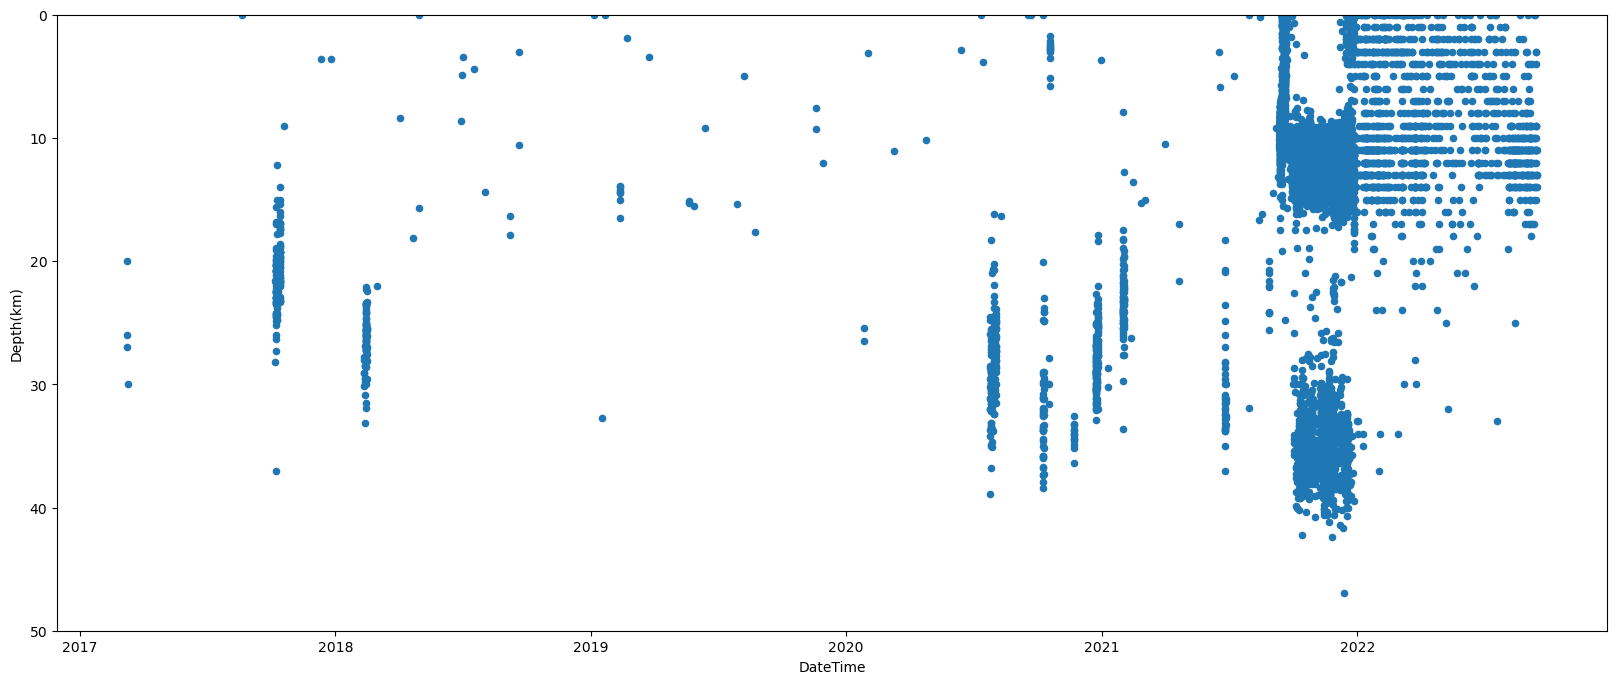

In [10]:
ax = df.plot.scatter(x='DateTime', y='Depth(km)', figsize=(20,8))
ax.set_ylim(50,0);

In [11]:
df['Swarm'] = 0
df.loc[(df['Date'] >= '2017-10-01') & (df['Date'] <= '2017-10-31'), 'Swarm'] = 1
df.loc[(df['Date'] >= '2019-02-01') & (df['Date'] <= '2019-02-28'), 'Swarm'] = 2
df.loc[(df['Date'] >= '2020-07-21') & (df['Date'] <= '2020-08-05'), 'Swarm'] = 3
df.loc[(df['Date'] >= '2020-10-04') & (df['Date'] <= '2020-10-10'), 'Swarm'] = 4
df.loc[(df['Date'] >= '2020-10-11') & (df['Date'] <= '2020-10-22'), 'Swarm'] = 5
df.loc[(df['Date'] >= '2020-11-15') & (df['Date'] <= '2020-11-29'), 'Swarm'] = 6
df.loc[(df['Date'] >= '2020-12-10') & (df['Date'] <= '2020-12-29'), 'Swarm'] = 7
df.loc[(df['Date'] >= '2020-12-10') & (df['Date'] <= '2020-12-31'), 'Swarm'] = 8
df.loc[(df['Date'] >= '2021-01-15') & (df['Date'] <= '2021-02-07'), 'Swarm'] = 9
df.loc[(df['Date'] >= '2021-06-01') & (df['Date'] <= '2021-06-30'), 'Swarm'] = 10
df.loc[(df['Date'] >= '2021-07-01'), 'Swarm'] = None


df['Phase'] = 0;
df.loc[(df['Date'] >= '2021-09-11') & (df['Date'] <= '2021-09-30'), 'Phase'] = 1
df.loc[(df['Date'] >= '2021-10-01') & (df['Date'] <= '2021-11-30'), 'Phase'] = 2
df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] <= '2021-12-31'), 'Phase'] = 3
df.loc[(df['Date'] >= '2021-12-31'), 'Phase'] = 4

In [11]:
df.to_csv("../data/lapalma_ign.csv", index=False)